Epoha: 0, Ukupna Nagrada: -28
Epoha: 10, Ukupna Nagrada: 0
Epoha: 20, Ukupna Nagrada: 14
Epoha: 30, Ukupna Nagrada: 4
Epoha: 40, Ukupna Nagrada: 6
Epoha: 50, Ukupna Nagrada: -2
Epoha: 60, Ukupna Nagrada: 8
Epoha: 70, Ukupna Nagrada: 10
Epoha: 80, Ukupna Nagrada: 0
Epoha: 90, Ukupna Nagrada: 4


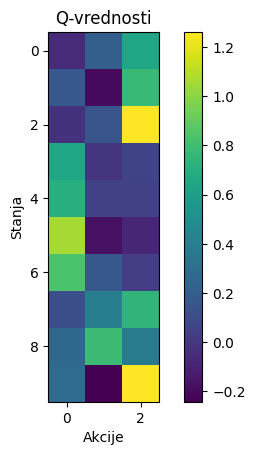

In [1]:
#Ovaj kod implementira osnovni Q-learning algoritam na jednostavnom primeru Markovljevog procesa odlučivanja (MDP). Evo detaljnijeg objašnjenja:

#Inicijalizacija: Prvo, inicijalizujemo broj klasa odeće (u ovom slučaju, pretpostavljamo 3 klase) i broj mogućih stanja (u ovom slučaju, 10 stanja). Takođe, generišemo slučajne podatke za stanja i stvarne klase.

#Q-vrednosti: Kreiramo matricu Q-vrednosti (Q_vrednosti) koja će se koristiti za praćenje vrednosti akcija u svakom stanju. Na početku, sve Q-vrednosti se postavljaju na nulu.

#Parametri učenja: Postavljamo parametre učenja, uključujući stopu učenja (alfa), faktor diskonta (gama) i verovatnoću epsilon-pohlepne politike (epsilon).

#Izbor akcije: Definišemo funkciju izaberi_akciju koja bira akciju za dato stanje na osnovu Q-vrednosti. Koristimo epsilon-pohlepnu politiku, gde s verovatnoćom epsilon biramo nasumičnu akciju (istraživanje), a sa (1 - epsilon) biramo akciju sa najvećom Q-vrednošću (pohlepa).

#Simulacija učenja: Implementiramo glavnu petlju za simulaciju učenja. Kroz svaku epohu, prolazimo kroz sve podatke o stanjima i stvarnim klasama. Za svako stanje, biramo akciju, simuliramo prelazak u novo stanje (u stvarnom svetu, ovaj korak bi zavisio od stvarnih akcija), proračunavamo nagradu (u stvarnom svetu, ova vrednost bi zavisila od tačnosti predikcije), ažuriramo Q-vrednosti prema Q-learning formuli.

#Prikaz Q-vrednosti: Na kraju, prikazujemo Q-vrednosti u obliku matrice koristeći matplotlib.

#Napomena: Ovaj primer je pojednostavljen i koristi se za ilustraciju osnovnih principa Q-learninga i MDP-a. U stvarnim aplikacijama, stanja, akcije i nagrade bi bili složeniji i određeni stvarnim podacima. Takođe, Q-learning bi se primenjivao na stvarne probleme mašinskog učenja kako bi model naučio optimalne akcije u određenim stanjima.

import numpy as np
import matplotlib.pyplot as plt

# Pretpostavljamo da imamo 3 klase odeće (0, 1, 2) i 10 mogućih stanja
broj_klasa = 3
broj_stanja = 10

# Generišemo slučajna stanja i klase
stanja = np.random.randint(0, broj_stanja, size=100)
istine_klase = np.random.randint(0, broj_klasa, size=100)

# Inicijalizujemo Q-vrednosti za svako stanje i akciju
Q_vrednosti = np.zeros((broj_stanja, broj_klasa))

# Parametri učenja
alfa = 0.1
gama = 0.9
epsilon = 0.1

# Funkcija za izbor akcije na osnovu Q-vrednosti (epsilon-pohlepna politika)
def izaberi_akciju(Q_vrednosti, stanje):
    if np.random.uniform(0, 1) < epsilon:
        # Slučajan izbor akcije (istraživanje)
        return np.random.choice(broj_klasa)
    else:
        # Izbor najbolje akcije na osnovu Q-vrednosti (pohlepa)
        return np.argmax(Q_vrednosti[stanje, :])

# Simulacija učenja
broj_epoha = 100
for epoha in range(broj_epoha):
    ukupna_nagrada = 0

    for i in range(len(stanja)):
        trenutno_stanje = stanja[i]
        stvarna_klasa = istine_klase[i]

        # Izbor akcije
        izabrana_klasa = izaberi_akciju(Q_vrednosti, trenutno_stanje)

        # Simulacija prelaska u novo stanje (u stvarnom svetu to bi zavisilo od stvarnih akcija)
        novo_stanje = np.random.randint(0, broj_stanja)

        # Proračunavanje nagrade (u stvarnom svetu ovo bi bilo na osnovu tačnosti predikcije)
        nagrada = 1 if izabrana_klasa == stvarna_klasa else -1

        # Ažuriranje Q-vrednosti prema Q-learning formuli
        Q_vrednosti[trenutno_stanje, izabrana_klasa] += alfa * (nagrada + gama * np.max(Q_vrednosti[novo_stanje, :]) - Q_vrednosti[trenutno_stanje, izabrana_klasa])

        ukupna_nagrada += nagrada

    if epoha % 10 == 0:
        print(f"Epoha: {epoha}, Ukupna Nagrada: {ukupna_nagrada}")

# Prikaz Q-vrednosti
plt.imshow(Q_vrednosti, cmap='viridis')
plt.colorbar()
plt.xlabel("Akcije")
plt.ylabel("Stanja")
plt.title("Q-vrednosti")
plt.show()
